In [90]:
%matplotlib inline
%pip install geopandas
%pip install geopy
%pip install folium
%pip install seaborn
%pip install scipy
%pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
import folium
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
data = pd.read_csv('Car Sales.xlsx - car_data.csv')
data.head()

sports_car_data =pd.read_csv('Sport car price.csv')

<h1>🚩Data preparation</h1>


In [4]:
data.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

<h3>No missing values✅</h3>

In [7]:
data.duplicated().sum()

0

<h3>No duplicate data✅</h3>

In [9]:
data.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

<h3>Note: some people have bought more than once a car✅</h3>

Phone != Car_id

In [8]:
data.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


<h3>Max car price is 85800 $📈</h3>
<h3>Min car price is 1200 $📉</h3>



<h1>🚩Hypotheses</h1>

<h3>1. Price Variation by gearbox type:</h3> 
Manual cars are usually considered cheaper than automatic cars.

Transmission
Auto      28248.525972
Manual    27914.710631
Name: Price ($), dtype: float64


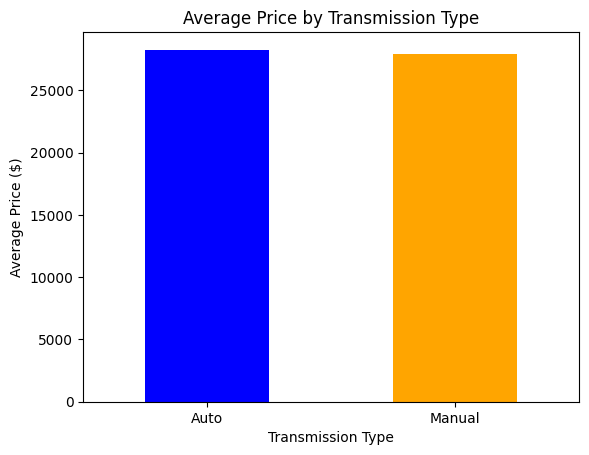

In [19]:

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Price ($)' column to numeric
data['Price ($)'] = pd.to_numeric(data['Price ($)'])

# Group by Transmission type and calculate average price
transmission_price = data.groupby('Transmission')['Price ($)'].mean()
print(transmission_price)

# Plotting
transmission_price.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()


From these findings, we can conclude that there is a slight difference in the average prices between cars with automatic and manual transmissions.✅

<h3>2. Customer Preference Analysis based on Annual Income</h3> 

Higher income = more luxury car?

Company
Cadillac      913476.457055
Hyundai       894106.772727
Saab          892487.771429
Mercury       890657.229977
Toyota        876490.990090
Nissan        863774.747178
Infiniti      861800.923077
Buick         855929.840547
Volkswagen    854321.878470
Porsche       853423.822715
Volvo         837570.499366
Plymouth      834670.745543
Dodge         834585.241771
Mitsubishi    833272.748630
Chrysler      833011.186607
BMW           831186.075949
Oldsmobile    830651.319532
Mercedes-B    823098.915953
Audi          819655.626068
Saturn        816950.767918
Jeep          814149.966942
Ford          813954.126394
Acura         810430.190131
Chevrolet     799263.693238
Subaru        795085.550617
Lincoln       794274.695122
Pontiac       790448.979899
Honda         778164.860169
Lexus         776040.334165
Jaguar        732528.544444
Name: Annual Income, dtype: float64


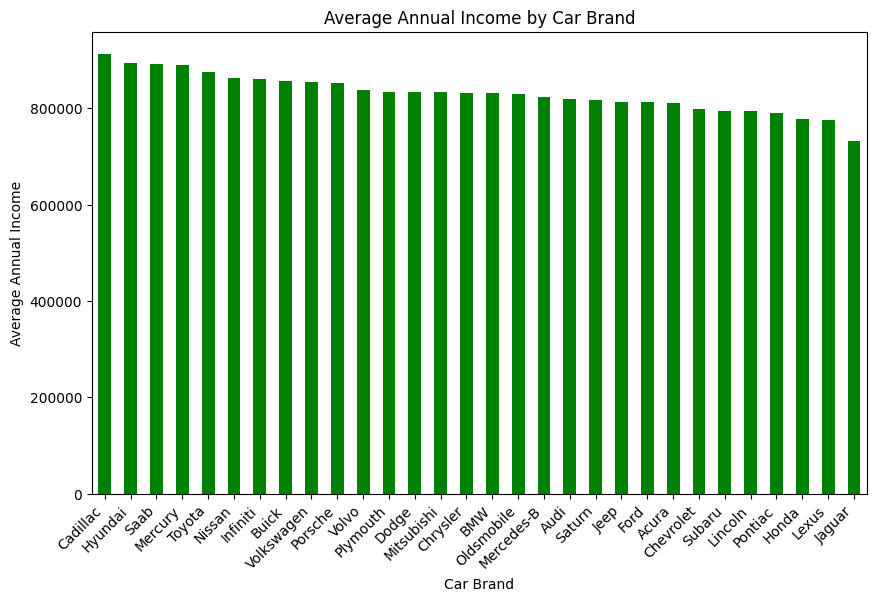

In [24]:
# Group by car brand and calculate the average annual income
brand_income_preference = data.groupby('Company')['Annual Income'].mean().sort_values(ascending=False)

# Print or visualize the result
print(brand_income_preference)

# You can also visualize the result using a bar plot
brand_income_preference.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Annual Income by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>3. Trend Analysis::</h3>
Track the sales trends over time to identify seasonal variations or long-term trends. Are there specific times of the year when certain types of cars sell better? Are there any 

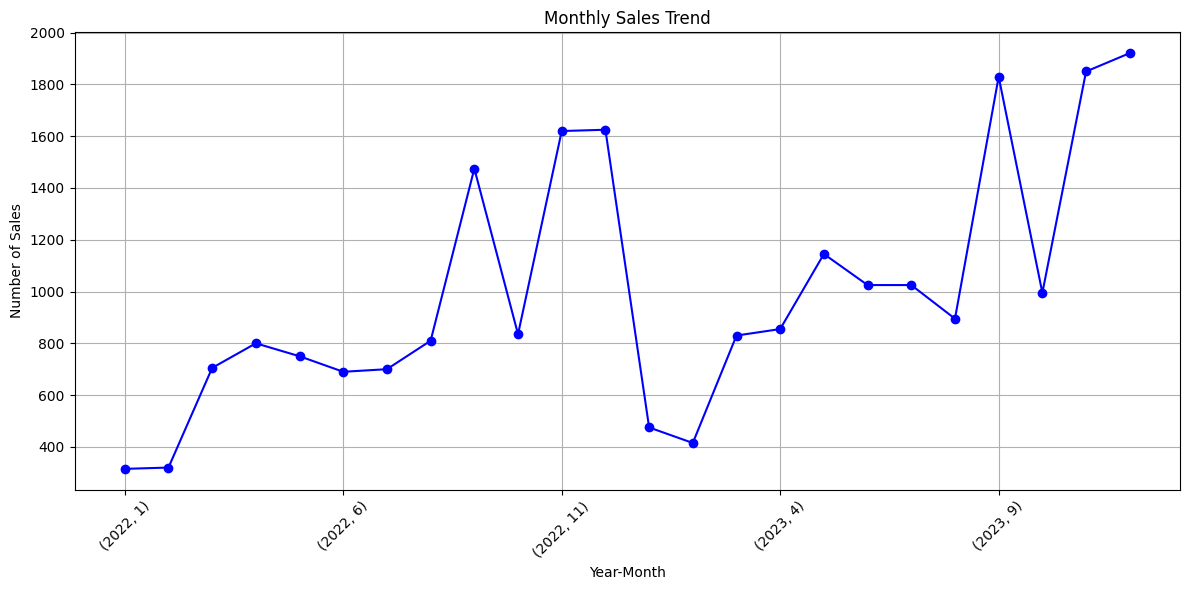

Monthly Sales Trend:
Year  Month
2022  1         315
      2         320
      3         705
      4         800
      5         750
      6         690
      7         700
      8         810
      9        1475
      10        835
      11       1620
      12       1625
2023  1         475
      2         415
      3         830
      4         855
      5        1145
      6        1025
      7        1025
      8         895
      9        1830
      10        995
      11       1850
      12       1921
dtype: int64


In [86]:

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Group by month and year to calculate total sales
monthly_sales = data.groupby(['Year', 'Month']).size()

# Plotting the trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='blue', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Monthly Sales Trend:")
print(monthly_sales)

<h3>The sales data suggests that there might be seasonal variations or external factors influencing consumer behavior, leading to fluctuations in sales numbers.✅</h3>

c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ferenc\AppData\Local\Temp\ipykernel_19284\2184959456.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red

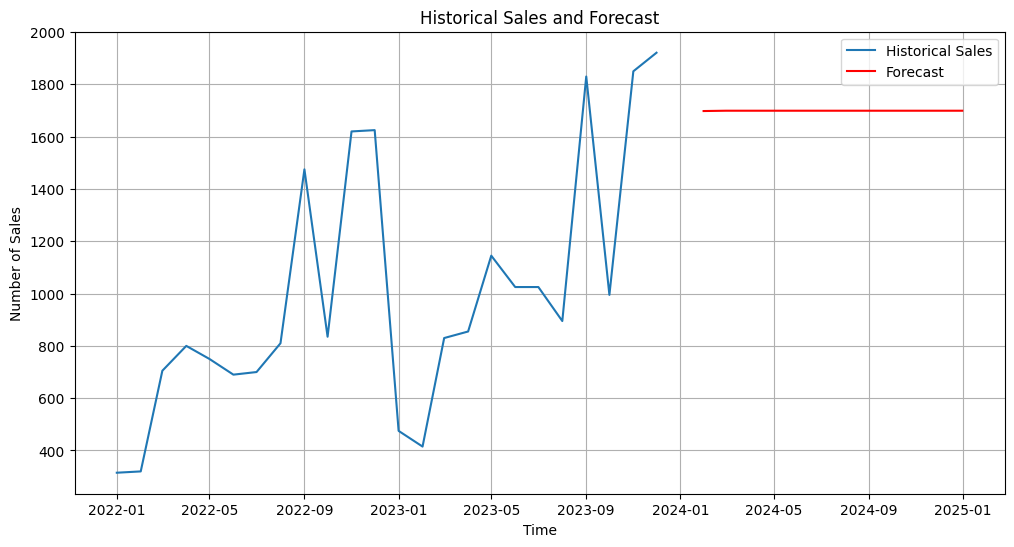

Forecasted Sales:
2024-01-01    1697.995054
2024-02-01    1699.238225
2024-03-01    1699.231295
2024-04-01    1699.231333
2024-05-01    1699.231333
2024-06-01    1699.231333
2024-07-01    1699.231333
2024-08-01    1699.231333
2024-09-01    1699.231333
2024-10-01    1699.231333
2024-11-01    1699.231333
2024-12-01    1699.231333
Freq: MS, Name: predicted_mean, dtype: float64


In [89]:

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year to calculate total sales
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Set 'Date' column as the index
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))
monthly_sales.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(monthly_sales['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Make prediction for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plotting historical sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('Historical Sales and Forecast')
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.show()

# Printing the forecast
print("Forecasted Sales:")
print(forecast)

<h3>The problem here is that the forecasted sales values are constant for each month in the forecasted period. This is likely due to the simplicity of the ARIMA model used for forecasting and the limited amount of historical data available in the provided dataset.❌</h3>

c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Ferenc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

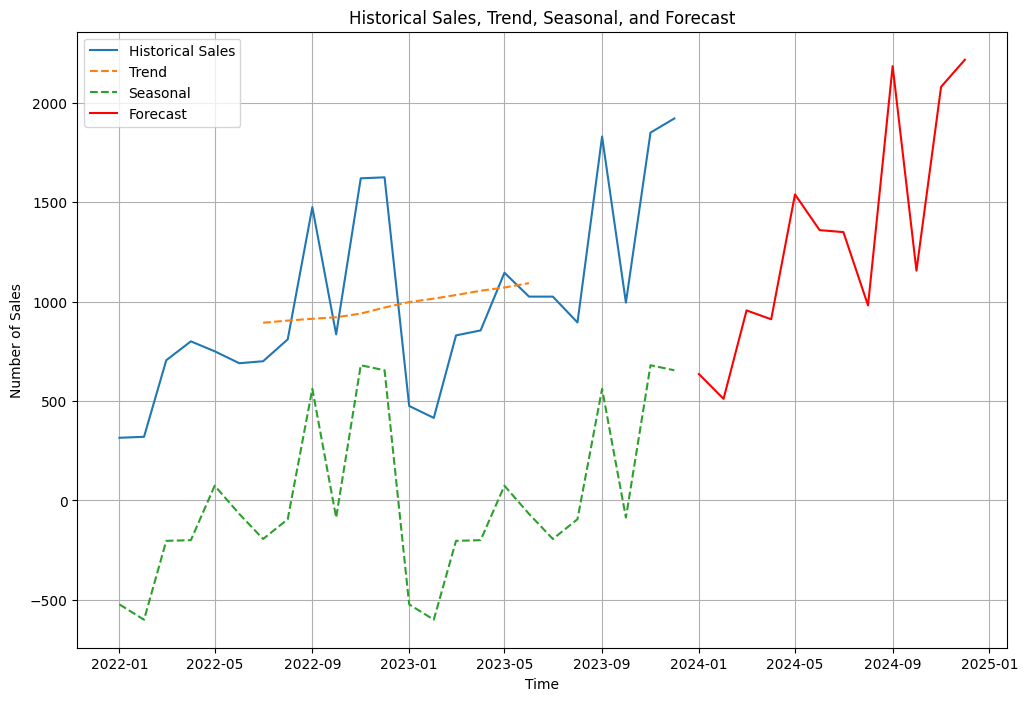

Forecasted Sales:
2024-01-01     635.486057
2024-02-01     510.831584
2024-03-01     955.632524
2024-04-01     911.038837
2024-05-01    1539.038262
2024-06-01    1359.386117
2024-07-01    1349.455705
2024-08-01     980.879635
2024-09-01    2184.236713
2024-10-01    1155.468504
2024-11-01    2079.981158
2024-12-01    2216.516402
Freq: MS, Name: predicted_mean, dtype: float64


In [91]:
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year to calculate total sales
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Set 'Date' column as the index
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))
monthly_sales.set_index('Date', inplace=True)

# Decompose the time series to identify trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Fit SARIMA model
model = SARIMAX(monthly_sales['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make prediction for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plotting historical sales, trend, seasonal, and forecast
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(trend.index, trend, label='Trend', linestyle='--')
plt.plot(seasonal.index, seasonal, label='Seasonal', linestyle='--')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Historical Sales, Trend, Seasonal, and Forecast')
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.show()

# Printing the forecast
print("Forecasted Sales:")
print(forecast)

<h3>In this improved approach, we've used a SARIMA model to explicitly capture any seasonal patterns in the sales data. Additionally, we've decomposed the time series into its trend, seasonal, and residual components to better understand the underlying patterns.✅</h3>

In conclusion, the prediction is more precize

noted:
- Történelmi Eladások: Az effektív eladási adatok az időben.<br>
- Trend: A hosszú távú trend a eladási adatokban, ami azt mutatja, hogy az eladások általában növekednek, csökkennek vagy stabilak maradnak-e az idő múlásával.<br>
- Szezonális: A szezonális minták az eladási adatokban, amelyek megmutatják az ismétlődő mintákat vagy ingadozásokat, amelyek rendszeresen előfordulnak (pl. havi vagy negyedéves).<br>
- Előrejelzett Értékek: A jövőbeli időszakokra vonatkozó előrejelzett eladások az SARIMA modell alapján.<br>

<h3>4. Gender of customers and the body style of cars:</h3>
analyze the correlation between gender of customers and the body style of cars

Contingency Table:
Body Style  Hardtop  Hatchback  Passenger   SUV  Sedan
Gender                                                
Female          647       1298        883  1335    945
Male           2324       4830       3062  5039   3543

Chi-square test statistic: 3.7811059955061026
P-value: 0.43643965301514065
Degrees of Freedom: 4
Expected frequencies table:
[[ 634.81418891 1309.37103656  842.92897181 1361.93390781  958.95189492]
 [2336.18581109 4818.62896344 3102.07102819 5012.06609219 3529.04810508]]


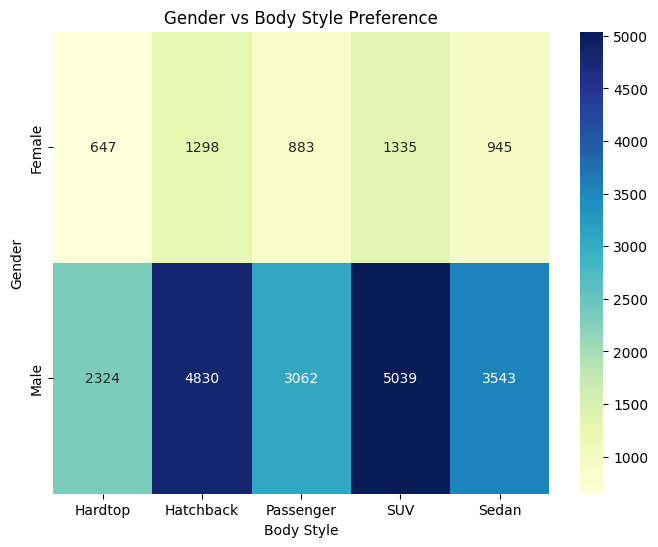

In [48]:
# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Body Style'])

# Print contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Gender vs Body Style Preference")
plt.xlabel("Body Style")
plt.ylabel("Gender")
plt.show()

<h1>🚩Coleration heatmap for SPORT CARS</h2>

In [179]:
# Create DataFrame
df = pd.DataFrame(sports_car_data)

# Convert numeric columns to numeric type
numeric_columns = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print("Missing values before data preparation:")
print(df.isnull().sum())

# Handle missing values (if any)
df.dropna(subset=['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)'], inplace=True)



# Check data types after conversion and handling missing values
print("\nData types after data preparation:")
print(df.dtypes)





Missing values before data preparation:
Car Make                      0
Car Model                     0
Year                          0
Engine Size (L)              59
Horsepower                    9
Torque (lb-ft)                8
0-60 MPH Time (seconds)       1
Price (in USD)             1007
dtype: int64

Data types after data preparation:
Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)            float64
Horsepower                 float64
Torque (lb-ft)             float64
0-60 MPH Time (seconds)    float64
Price (in USD)             float64
dtype: object


In [180]:
sports_car_data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [181]:
# Check minimum and maximum values for each numeric column
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"\nMinimum value of {column}: {min_value}")
    print(f"Maximum value of {column}: {max_value}")



Minimum value of Year: 1965
Maximum value of Year: 2023

Minimum value of Engine Size (L): 1.5
Maximum value of Engine Size (L): 8.4

Minimum value of Horsepower: 181.0
Maximum value of Horsepower: 2000.0

Minimum value of Torque (lb-ft): 151.0
Maximum value of Torque (lb-ft): 1732.0

Minimum value of 0-60 MPH Time (seconds): 1.8
Maximum value of 0-60 MPH Time (seconds): 6.5

Minimum value of Price (in USD): nan
Maximum value of Price (in USD): nan


<h3>Min-Max values</h3>

In [182]:
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Minimum value of {column}: {min_value}")
    print(f"Maximum value of {column}: {max_value}")

Minimum value of Year: 1965
Maximum value of Year: 2023
Minimum value of Engine Size (L): 1.5
Maximum value of Engine Size (L): 8.4
Minimum value of Horsepower: 181.0
Maximum value of Horsepower: 2000.0
Minimum value of Torque (lb-ft): 151.0
Maximum value of Torque (lb-ft): 1732.0
Minimum value of 0-60 MPH Time (seconds): 1.8
Maximum value of 0-60 MPH Time (seconds): 6.5
Minimum value of Price (in USD): nan
Maximum value of Price (in USD): nan


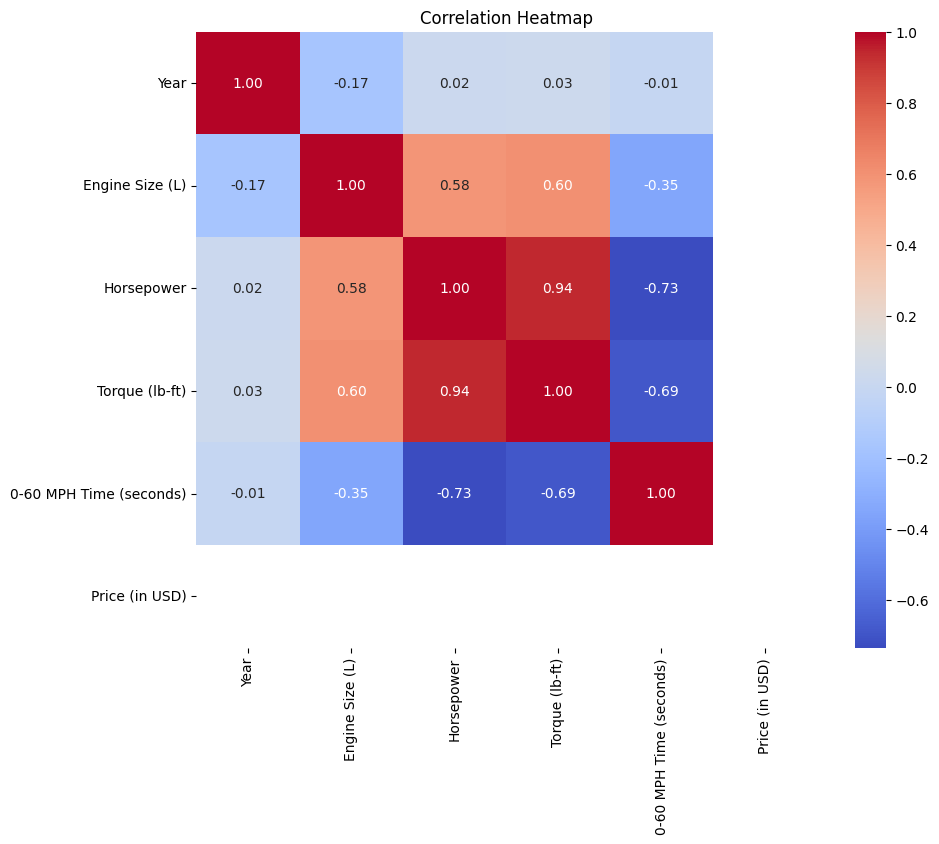

In [183]:
# Create DataFrame
df = pd.DataFrame(sports_car_data)

# Convert numeric columns to numeric type
numeric_columns = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Remove non-numeric columns
numeric_df = df.drop(columns=['Car Make', 'Car Model'])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()